## run notebooks

In [2]:
%run "../Notebooks/initialization.ipynb"
%run "../Notebooks/Input_selection_functions.ipynb"
%run "../Notebooks/Stitching_clean.ipynb"
%run "../Notebooks/Visualization_functions.ipynb"
%run "../Notebooks/Downsampling_and_outliers_functions.ipynb"
%load_ext autoreload

loading directory file
----------------------------------------
loaded variables from initialization file: 
> myparams, myconfiguration_file
> list_picked_id_source, list_picked_id_target
> data_folder
----------------------------------------


## Load the pointclouds

Complete is the one obtained by stitching 30 point clouds.

Two_sides is the one obtained by stitching 20 point clouds.

In [6]:
complete= o3d.io.read_point_cloud("complete.pcd")
two_sides= o3d.io.read_point_cloud("two_sides.pcd")

In [33]:
complete_cluster_3 = o3d.io.read_point_cloud("complete_cluster_3.pcd")

In [7]:

custom_draw_geometry(complete,
                     mytitle = "complete",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = True)

[Open3D WARNING] GLFW Error: The GLFW library is not initialized


loading parameters: 
  ./ScreenCamera_2021-01-12-16-04-11.json
[Open3D WARNING] Read JSON failed: unable to open file: ./ScreenCamera_2021-01-12-16-04-11.json
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
loading configuration file: 
  ./RenderOption_2021-01-12-16-04-10.json
[Open3D WARNING] Read JSON failed: unable to open file: ./RenderOption_2021-01-12-16-04-10.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


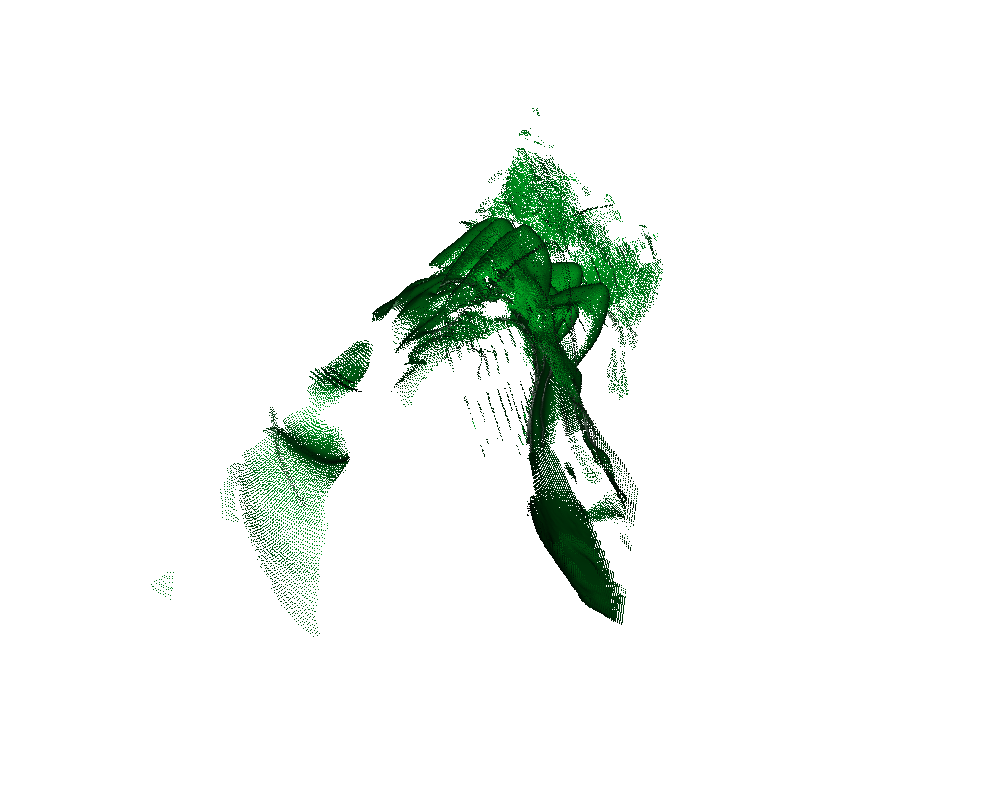

In [12]:
custom_draw_geometry(two_sides,
                     mytitle = "complete",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = True)
newest = last_file_containing("Screen", extension = '.png')
Im(filename=newest,width = 400)

In [7]:
get_num_points([complete])

[677380]

## Cleaning the point clouds

* We tried with outlier removal, via statistical and radius, but ultimately the **clustering** returns the best output.
* Also a custom function to take away points lying on a certan plane (and within a certain distance from it)is implemented.
* Finally a useful inbuilt tool of open3d is tested and used, it allows the selection of portion of the geometry in visualization mode, by pressing the appropriate keys and saving the selected part of the geometry.

### attempt using statistical outliers
It is not too bad, but it is sensitive to parameters and takes away valid information together with artifacts.

statistical outlier removal for complete
loading parameters: 
  ./ScreenCamera_2021-01-17-15-06-45.json
loading configuration file: 
  ./RenderOption_2021-01-17-10-29-39.json
snipping statistical outlier removal for complete-my_nb_neighbors=100-my_std_ratio=0.99.png


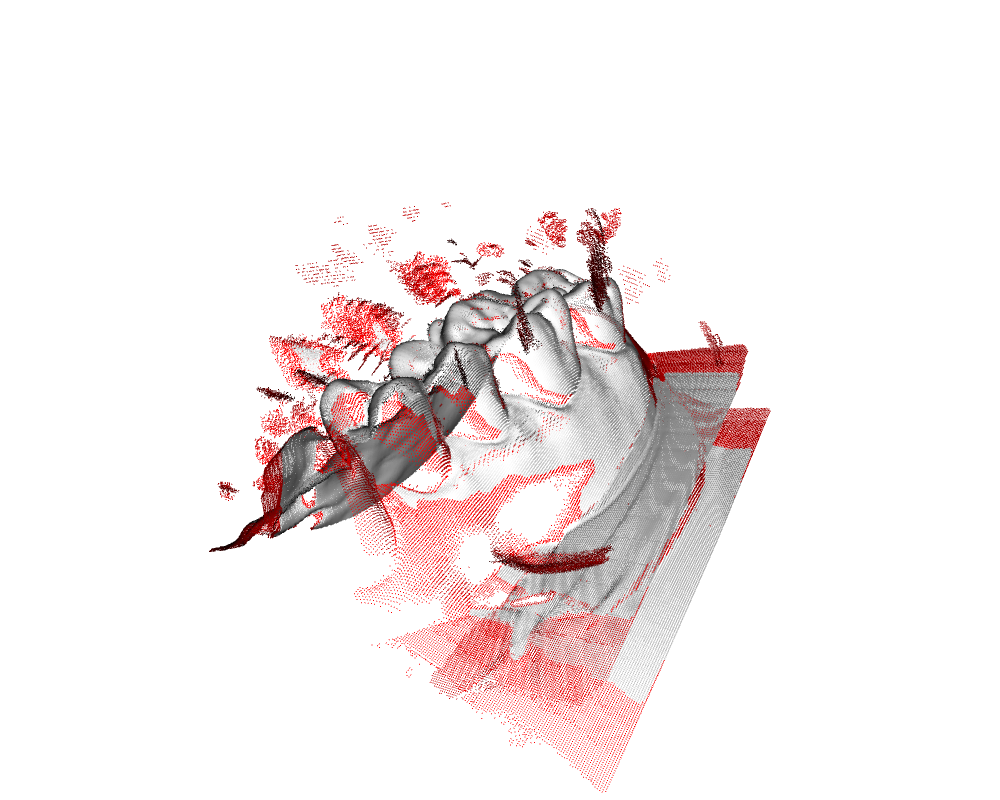

In [8]:
# ind are the inlier indexes
processed_stitches,ind = exclude_outliers_list_stitches(["complete"],[complete],[[0,0.5,0.1]], 
                               parameters= (100,0.99),
                               preprocess_outliers = "stat" ,
                               take_screen_shot = True,
                               visualization_on = True,
                               rotate = False)

newest = last_file_containing("statistical", extension = '.png')
Im(filename=newest,width = 400) 

### attempt using radius outliers
Not even close..

radius outlier removal for complete
loading parameters: 
  ./ScreenCamera_2021-01-17-15-06-45.json
loading configuration file: 
  ./RenderOption_2021-01-17-10-29-39.json
snipping radius outlier removal for complete-nb_points=10-radius=0.4.png


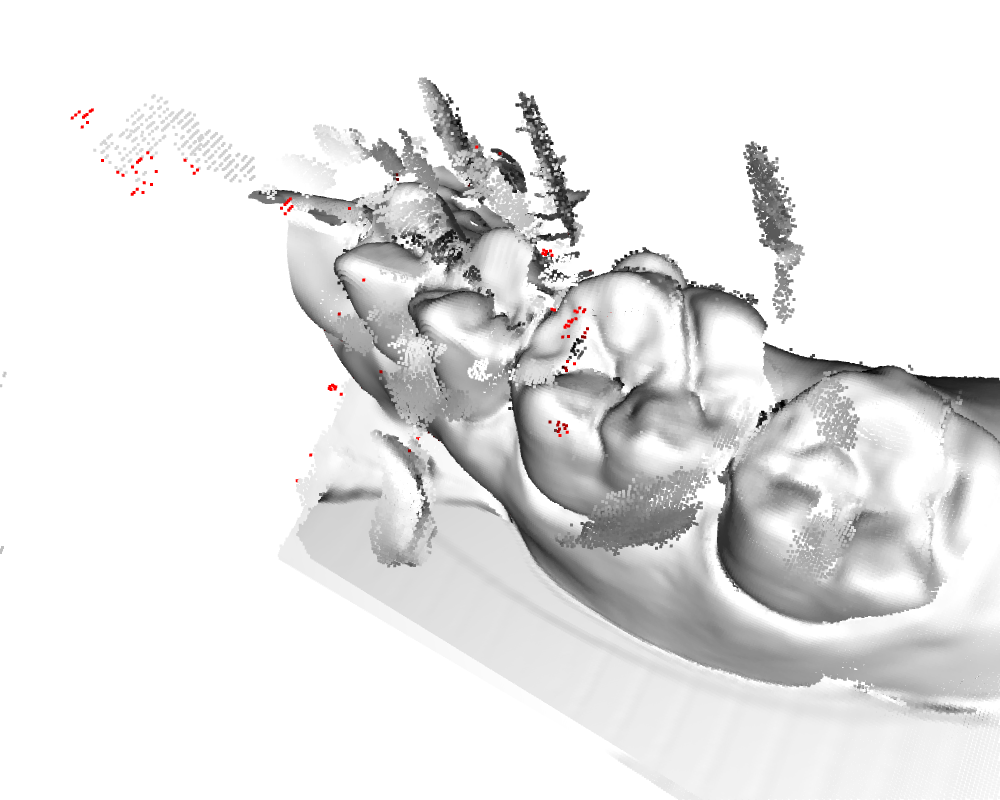

In [9]:
processed_stitches,ind = exclude_outliers_list_stitches(["complete"],[complete],[[0,0.5,0.1]], 
                               parameters= (10,0.4),
                               preprocess_outliers = "radius" ,
                               take_screen_shot = True,
                               visualization_on = True,
                               rotate = False)

newest = last_file_containing("radius", extension = '.png')
Im(filename=newest,width = 400) 

### Clustering

Best solution, leaves us with the big block of pointcloud that are closely connected.
We show the result of the clustering on both the major stitches.

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 178

point cloud has 178 clusters
there are 677380 points in all clusters
there are 12360 points identified as ouliers 
there are 652873 points in the biggest cluster 


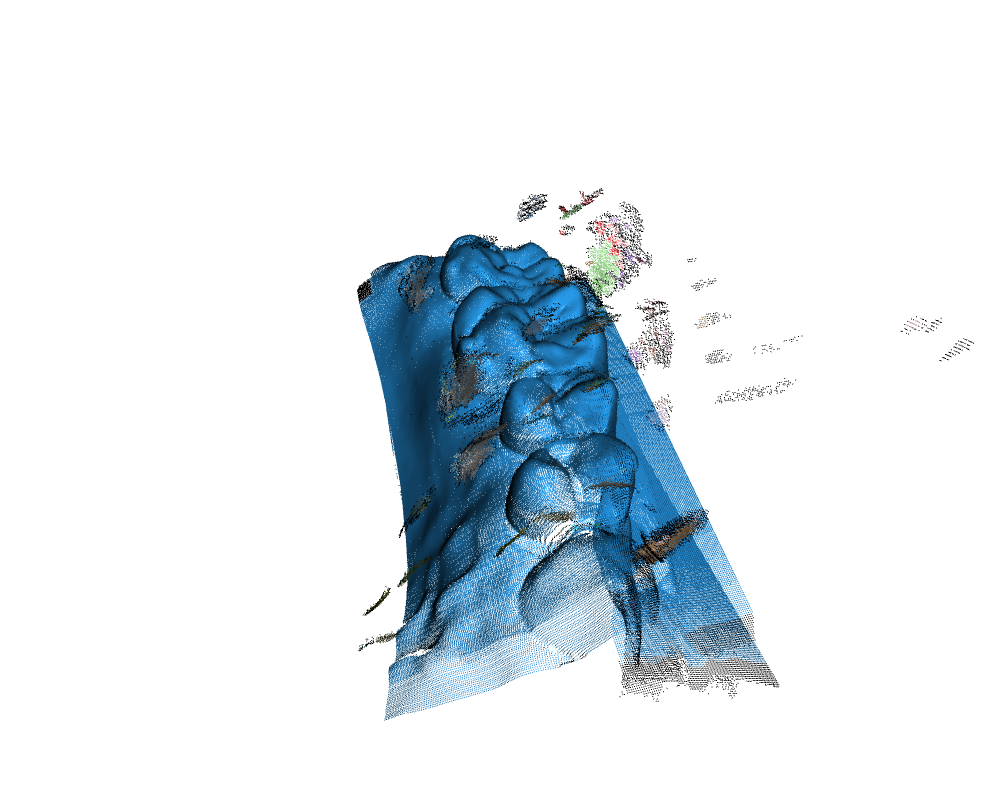

In [10]:
complete_cluster = clustering(  complete,
                                myeps=0.2, 
                                mymin_points=10,

                                mytitle = "clustering",
                                params =myparams, 
                                configuration_file = myconfiguration_file, 
                                take_screen_shot = True,
                                rotate = False, # with this true the screenshot its black
                              
                              
                                #statements
                                print_statement = True,
                                visualization_on = True)

newest = last_file_containing("clustering", extension = '.png')
Im(filename=newest,width = 400) 

In [11]:
#save
o3d.io.write_point_cloud(mytimestamp() +"complete_cluster.pcd", complete_cluster)

True

In [12]:
last_file(".pcd")

'./17012021-17h50m08s-complete_cluster.pcd'

In [14]:
two_sides_cluster = clustering(  two_sides,
                                myeps=0.2, 
                                mymin_points=10,

                                mytitle = "clustering",
                                params =myparams, 
                                configuration_file = myconfiguration_file, 
                                take_screen_shot = True,
                                rotate = False, # with this true the screenshot its black
                              
                              
                                #statements
                                print_statement = True,
                                visualization_on = True)

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 189

point cloud has 189 clusters
there are 400627 points in all clusters
there are 13104 points identified as ouliers 
there are 312811 points in the biggest cluster 


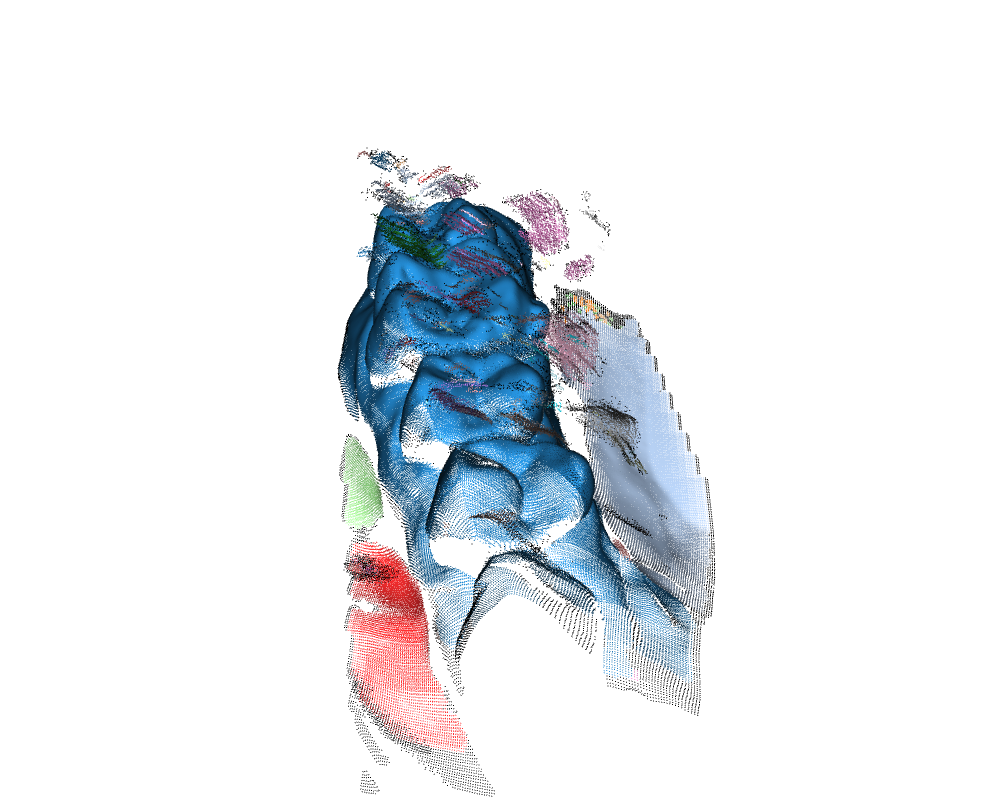

In [15]:
newest = last_file_containing("clustering", extension = '.png')
Im(filename=newest,width = 600) 

In [26]:
#save
o3d.io.write_point_cloud("cluster_two_sides_cluster.pcd", two_sides_cluster)

True

## plane segmentation

The problem with default plane segmentation is that not always detect the plane we want and we risk to go on endlessly...

In [474]:
complete_cluster_2 = find_and_delete_planes(complete_cluster)

Plane equation: -0.15x + -0.55y + 0.82z + -42.85 = 0
plane detected contains 63891 points
loading parameters: 
  ./ScreenCamera_2021-01-12-16-04-11.json
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
loading configuration file: 
  ./RenderOption_2021-01-12-16-04-10.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized
Delete the plane in red (y/n): 
y
continue finding planes (y/n): 
y
Plane equation: -0.15x + -0.55y + 0.82z + -42.85 = 0
plane detected contains 63891 points
loading parameters: 
  ./ScreenCamera_2021-01-12-16-04-11.json
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
loading configuration file: 
  ./RenderOption_2021-01-12-16-04-10.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized
Delete the plane in red (y/n): 
n
continue finding planes (y/n): 
y
Plane equation: -0.15x + -0.55y + 0.82z + -4

In [475]:
custom_draw_geometry(complete_cluster_2,
                     mytitle = "complete_2",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = True)

loading parameters: 
  ./ScreenCamera_2021-01-12-16-04-11.json
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
loading configuration file: 
  ./RenderOption_2021-01-12-16-04-10.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


In [476]:
#save
o3d.io.write_point_cloud(mytimestamp() +"complete_cluster_2.pcd", complete_cluster_2)

True

In [479]:
complete_cluster = clustering(  complete_cluster_2,
                                myeps=0.2, 
                                mymin_points=10,

                                mytitle = mytimestamp() +"clustering",
                                params =myparams, 
                                configuration_file = myconfiguration_file, 
                                take_screen_shot = True,
                                rotate = False, # with this true the screenshot its black
                              
                              
                                #statements
                                print_statement = True,
                                visualization_on = True)

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 5
loading parameters: 
  ./ScreenCamera_2021-01-12-16-04-11.json
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
loading configuration file: 
  ./RenderOption_2021-01-12-16-04-10.json
snipping

point cloud has 5 clusters
there are 588982 points in all clusters
there are 997 points identified as ouliers 
there are 489367 points in the biggest cluster 


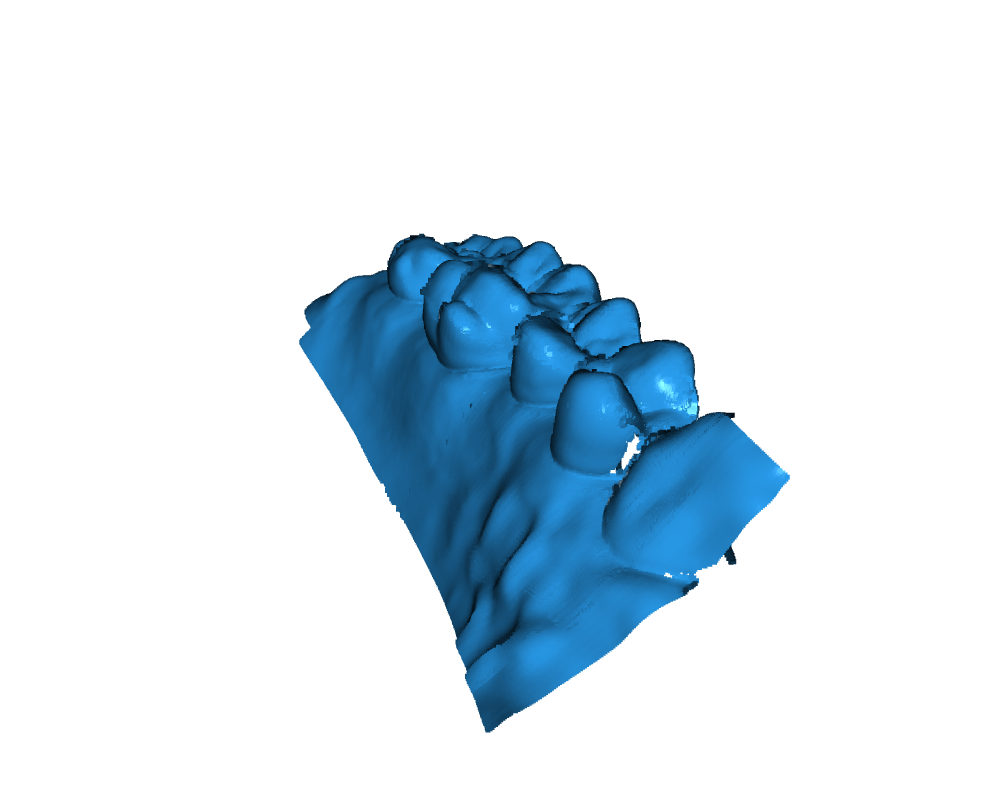

In [480]:
newest = last_file()
#newest = last_file_containing("clustering", extension = '.png')
Im(filename=newest,width = 400) 

In [356]:
#save
o3d.io.write_point_cloud(mytimestamp()+"complete_cluster_3.pcd", complete_cluster)

True

## manual selection of planes

Select three points lying on the same plane, to identify it and get rid of it.

In [498]:
complete_cluster_4 = custom_remove_plane(complete_cluster_3,
                                        nneg_margin = 0.1,
                                        ppos_margin = 0.2,

                                        #visualization parameters
                                        #mytitle = "Selection of planes to remove", mytuples = None, 
                                        #params = None, #camera parameters,json file (P)
                                        #fov_step  = None, 
                                        #configuration_file = None, #object properties ,json file (O)
                                        #rotate = False,

                                        #statements
                                        print_statements = True,
                                        visualization_on = True,
                                       )


1) Please pick at least 3 points using [shift + left click]
   Press [shift + right click] to undo point picking
2) After picking points, press 'Q' to close the window
[Open3D INFO] Picked point #336742 (-7.9, 5.6, 59.) to add in queue.
[Open3D INFO] Picked point #316271 (-6.0, 4.8, 59.) to add in queue.
[Open3D INFO] Picked point #314350 (-5.4, 3.9, 57.) to add in queue.


plane point:  [-6.43874375  4.77424701 58.03027725]
normal to the plane:  [-0.24386344 -0.9048684   0.34891805]

total number of points:  569830
number excluded points :  8900
with pos_margin= 0.2 ; neg_margin= 0.1

calculating indexes (might take a while...)
current parameters
('pos_margin', 0.2)
('neg_margin', 0.1)
update parameters (y/n): 
n
Delete the space in red (y/n): 
n
continue finding planes (y/n): 
n
no points deleted


In [493]:
custom_draw_geometry(complete_cluster_4, 
                     mytitle = "cleaned up point cloud", mytuples = "",
                     params =myparams, 
                     configuration_file = myconfiguration_file, 
                     take_screen_shot = False,
                     rotate = True)

loading parameters: 
  ./ScreenCamera_2021-01-12-16-04-11.json
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
loading configuration file: 
  ./RenderOption_2021-01-12-16-04-10.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


In [322]:
len(complete_cluster_4.points)

539859

### saving 

In [ ]:
o3d.io.write_point_cloud("complete_clean", complete_cluster_4)

In [45]:
outlier_cloud = biggest_cluster_cloud.select_by_index(inliers, invert=True)

## geometrical selection


In [ ]:
demo_crop_geometry(complete_cluster_3)